### Histogram Binning and Density

In [113]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

(array([  5.,  16.,  55., 135., 232., 283., 178.,  64.,  23.,   9.]),
 array([-3.54292616, -2.86244585, -2.18196554, -1.50148522, -0.82100491,
        -0.1405246 ,  0.53995571,  1.22043603,  1.90091634,  2.58139665,
         3.26187696]),
 <a list of 10 Patch objects>)

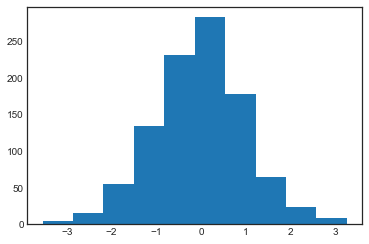

In [3]:
plt.style.use('seaborn-white')    # This is a simple way to construct histogram where no bins are mentioned 
data=np.random.randn(1000)
plt.hist(data)

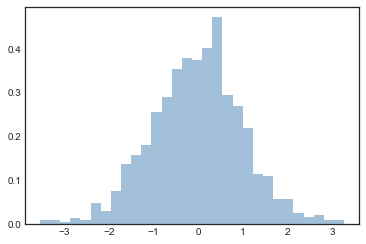

In [7]:
plt.hist(data, bins=30, density=True, alpha=0.5,     
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
#The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
 # This is separate from the ipykernel package so we can avoid doing imports until

The plt.hist docstring has more information on other customization options avail‐
able. I find this combination of histtype='stepfilled' along with some transpar‐
ency alpha to be very useful when comparing histograms of several distributions


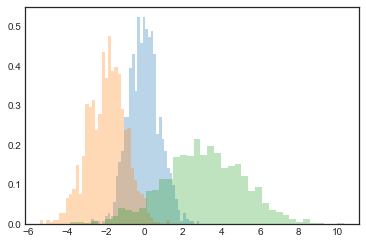

In [10]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of
points in a given bin) and not display it, the np.histogram() function is available

In [14]:
counts,bin_edges=np.histogram(data,bins=5)
print(counts);
print(bin_edges)

[ 21 190 515 242  32]
[-3.54292616 -2.18196554 -0.82100491  0.53995571  1.90091634  3.26187696]


Just as we create histograms in one dimension by dividing the number line into bins,
we can also create histograms in two dimensions by dividing points among twodimensional bins

In [29]:
np.random.multivariate_normal?

In [5]:
mean = (1, 2)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (3, 3))
x.shape

(3, 3, 2)

### Two-Dimensional Histograms and Binnings


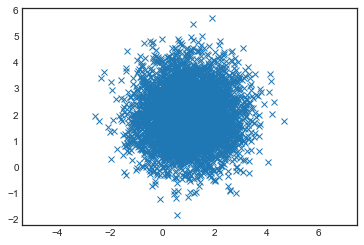

In [26]:
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [7]:
x,y=np.random.multivariate_normal(mean, cov, 5000).T
print(x);print(y)

[1.08461272 0.14135896 2.4785006  ... 2.52246197 0.22257671 1.62635095]
[1.52747885 1.09622971 2.60380652 ... 1.49468679 3.05926046 3.1156604 ]


In [27]:
np.random.multivariate_normal(mean, cov, (3, 3))

array([[[ 1.50222984,  1.96054061],
        [ 3.40734545,  1.94364604],
        [ 0.13025833,  3.38030028]],

       [[ 1.21269524,  1.29789945],
        [-0.07230196,  2.87661104],
        [ 0.09244973,  0.91694229]],

       [[ 3.1132506 ,  1.80050457],
        [ 0.56407971,  2.83185136],
        [-0.65102173,  1.78969379]]])

### plt.hist2d: Two-dimensional histogram


In [24]:
np.random.seed(0)
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
print(x),print(y)

[-1.71096765 -2.01067153 -1.07485433 ...  0.71888542  0.12282159
  1.07244689]
[-2.2979908  -0.61900693 -2.88800988 ...  1.48253857  0.13141722
  1.35139832]


(None, None)

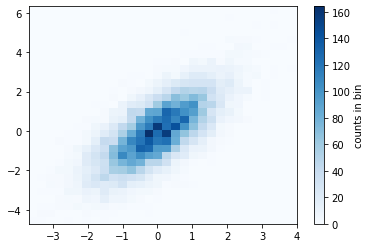

In [21]:
 plt.hist2d(x, y, bins=30, cmap='Blues')
 cb = plt.colorbar()
 cb.set_label('counts in bin')  # plt.colorbar.set_label() used to label the colorbar on the right

 just as
plt.hist has a counterpart in np.histogram, plt.hist2d has a counterpart in
np.histogram2d, which can be used as follows

In [38]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

In [41]:
np.histogramdd?  #Computes the multidimensional histogram of some data.

### plt.hexbin: Hexagonal binnings


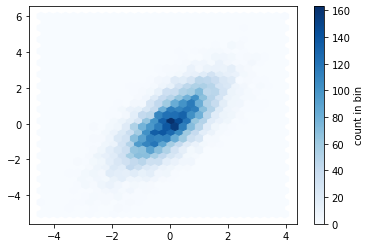

In [25]:
plt.hexbin(x,y,gridsize=30,cmap='Blues')
plt.colorbar(label='count in bin')

plt.hexbin() has a number of interesting options, including the ability to specify
weights for each point, and to change the output in each bin to any NumPy aggregate

### Kernel density estimation

 for now we’ll simply mention that KDE can be
thought of as a way to “smear out” the points in space and add up the result to obtain
a smooth function. One extremely quick and simple KDE implementation exists in
the scipy.stats package

In [12]:
from scipy.stats import gaussian_kde

In [47]:
gaussian_kde?

In [26]:
# fit an array of size [Ndim, Nsamples]
data=np.vstack([x,y])
kde=gaussian_kde(data)

# Evaluate on a regular grid
xgrid=np.linspace(-3.5,3.5,400)    # As the linspace value is increased , data becomes flowing
ygrid=np.linspace(-6,6,400)
X_grid,Y_grid=np.meshgrid(xgrid,ygrid)
Z=kde.evaluate(np.vstack([X_grid.ravel(),Y_grid.ravel()]))

In [31]:
Z

array([1.24156790e-07, 1.51351726e-07, 1.82174744e-07, ...,
       1.70242928e-06, 2.34967570e-06, 3.29365733e-06])

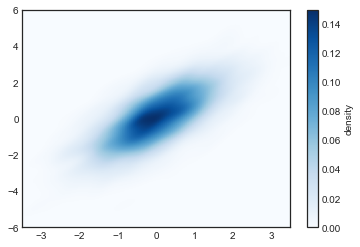

In [58]:
# Plot the result as an image
plt.imshow(Z.reshape(X_grid.shape),
            origin='lower', aspect='auto',
            extent=[-3.5, 3.5, -6, 6],
            cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and
smoothness (one example of the ubiquitous bias–variance trade-off). The literature
on choosing an appropriate smoothing length is vast: gaussian_kde uses a rule of
thumb to attempt to find a nearly optimal smoothing length for the input data

Other KDE implementations are available within the SciPy ecosystem, each with its
own various strengths and weaknesses; see, for example, sklearn.neighbors.Kernel
Density and statsmodels.nonparametric.kernel_density.KDEMultivariate

### Customizing Plot Legends


Plot legends give meaning to a visualization, assigning labels to the various plot ele‐
ments. We previously saw how to create a simple legend; here we’ll take a look at cus‐
tomizing the placement and aesthetics of the legend in Matplotlib

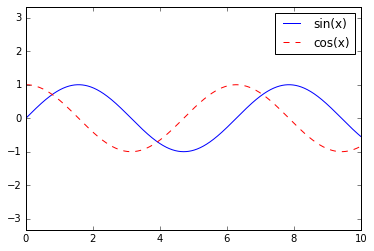

In [3]:
plt.style.use('classic')
%matplotlib inline
x=np.linspace(0,10,1000)
fig, ax=plt.subplots()
ax.plot(x,np.sin(x),'-b',label='sin(x)')
ax.plot(x,np.cos(x),'--r',label='cos(x)')
ax.axis('equal')
ax.legend()

These legends can be customised as shown below

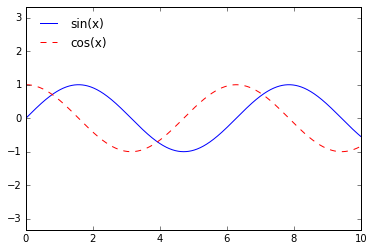

In [34]:
ax.legend(loc='upper left',frameon=False)    # frameon=False removes the frame across the legend
fig

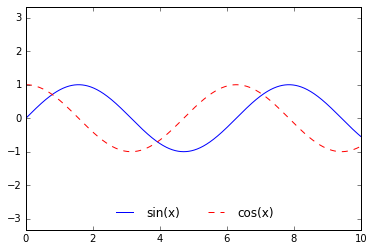

In [36]:
ax.legend(loc='lower center',frameon=False,ncol=2)  # ncol tells that represent the legends as row
fig

We can use a rounded box (fancybox) or add a shadow, change the transparency
(alpha value) of the frame, or change the padding around the text 

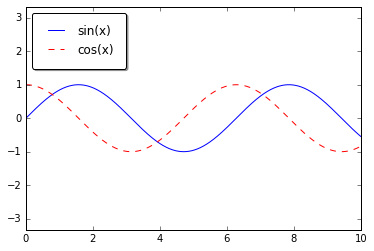

In [47]:
ax.legend(fancybox=True,framealpha=1,shadow=True,borderpad=1,loc='upper left')
fig   # border pad inc or dec the size of legend's border

### Choosing Elements for the Legend

As we’ve already seen, the legend includes all labeled elements by default. If this is not
what is desired, we can fine-tune which elements and labels appear in the legend by
using the objects returned by plot commands. The plt.plot() command is able to
create multiple lines at once, and returns a list of created line instances. Passing any of
these to plt.legend() will tell it which to identify, along with the labels we’d like to
specify

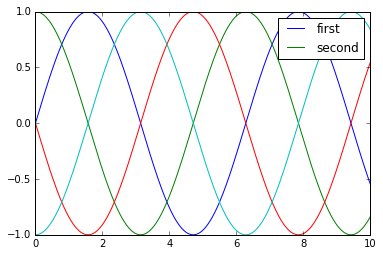

In [58]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines=plt.plot(x, y)
# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

 applying labels to
the plot elements you’d like to show on the legend

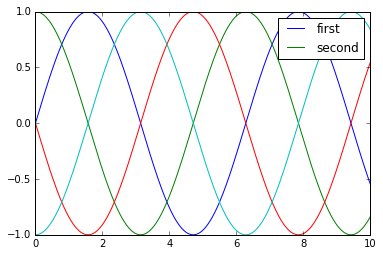

In [64]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

In [2]:
plt.clim?
'''If you want to set the clim of multiple images, use
`~.ScalarMappable.set_clim` on every image, for example::

  for im in gca().get_images():
      im.set_clim(0, 0.5)'''

### Multiple Legends

Sometimes when designing a plot you’d like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard legend interface,
it is only possible to create a single legend for the entire plot. If you try to create a
second legend using plt.legend() or ax.legend(), it will simply override the first
one. We can work around this by creating a new legend artist from scratch, and then
using the lower-level ax.add_artist() method to manually add the second artist to
the plot

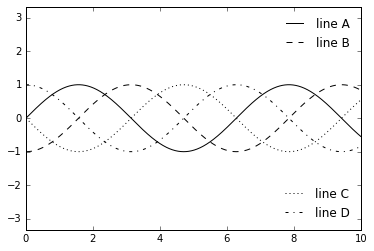

In [4]:
fig,ax=plt.subplots()
lines=[]
styles=['-','--',':','-.']
for i in range (4):
    lines +=ax.plot(x,np.sin(x-i*np.pi/2),  # because of this lines += all legends are shown , otherwise line A only will be 
                    styles[i],color='black')   # shown
ax.axis('equal')
ax.legend(lines[:2],['line A','line B'],
         loc='upper right',frameon=False)
# adding multiple legends
from matplotlib.legend import Legend
leg=Legend(ax,lines[2:],['line C','line D'],
           loc='lower right',frameon=False)
ax.add_artist(leg)

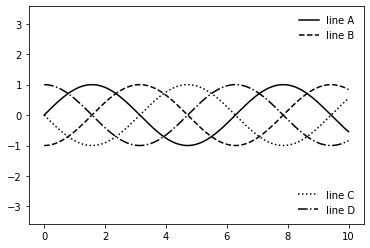

In [4]:
x=np.linspace(0,10,1000)
fig,ax=plt.subplots()
lines=[]
styles=['-','--',':','-.']
for i in range (4):
    lines +=ax.plot(x,np.sin(x-i*np.pi/2),
                    styles[i],color='black')
ax.axis('equal')
ax.legend(lines[:2],['line A','line B'],
         loc='upper right',frameon=False)
# adding multiple legends
from matplotlib.legend import Legend
leg=Legend(ax,lines[2:],['line C','line D'],
           loc='lower right',frameon=False)
ax.add_artist(leg)

In [5]:
ax.legend?

### Customizing Colorbars

Plot legends identify discrete labels of discrete points. For continuous labels based on
the color of points, lines, or regions, a labeled colorbar can be a great tool.

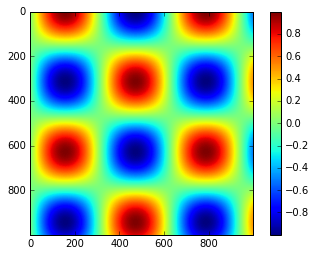

In [26]:
%matplotlib inline
x=np.linspace(0,10,1000)
I=np.sin(x)*np.cos(x[:,np.newaxis])
plt.imshow(I)
plt.colorbar()

We can specify the colormap using the cmap argument to the plotting function that is
creating the visualization

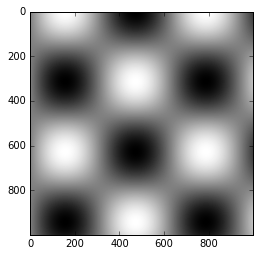

In [27]:
plt.imshow(I,cmap='gray')

In [25]:
plt.cm.  # press tab and u will get list of possible cmaps


SyntaxError: invalid syntax (<ipython-input-25-1a48886f69f0>, line 1)

But being able to choose a colormap is just the first step: more important is how to
decide among the possibilities! The choice turns out to be much more subtle than you
might initially expect

### Color limits and extensions

The colorbar has some interesting flexibility; for example, we
can narrow the color limits and indicate the out-of-bounds values with a triangular
arrow at the top and bottom by setting the extend property. This might come in
handy, 

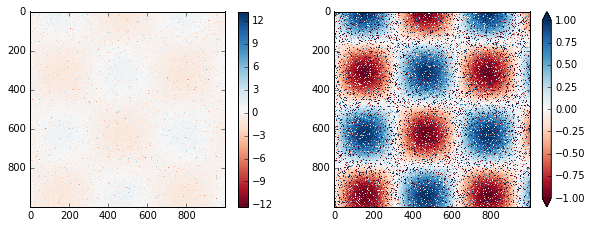

In [48]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)  #  I.shape is 1000,1000 , there are (1000,1000) random variables
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

In [36]:
np.random.normal?

### Discrete colorbars

Colormaps are by default continuous, but sometimes you’d like to represent discrete
values. The easiest way to do this is to use the plt.cm.get_cmap() function, and pass
the name of a suitable colormap along with the number of desired bins

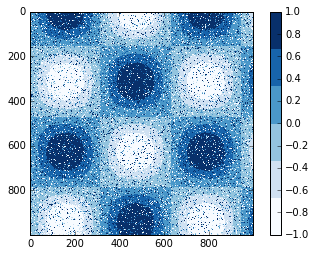

In [49]:
 plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
 plt.colorbar()
 plt.clim(-1, 1);


## Example: Handwritten Digits

In [50]:
from sklearn.datasets import load_digits

In [51]:
load_digits?

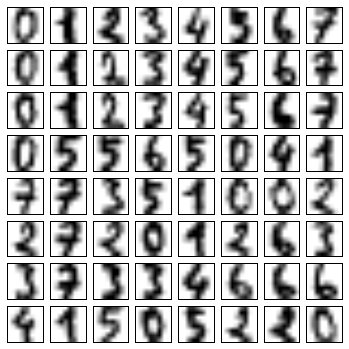

In [91]:
digits = load_digits(n_class=8) # This n_class=8 tells to load 8 digits , that means (0,1,2,3,4,5,6,7)
fig, ax = plt.subplots(8, 8, figsize=(6,6))  # 8,8 tells about rows and columns , figsize inc or dec the size of blocks 

''' The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...'''
for i,axi in enumerate(ax.flat):  
   axi.imshow(digits.images[i], cmap='binary') 
   axi.set(xticks=[], yticks=[])
# ax.flat-> A `flatiter` iterator is returned by ``x.flat`` for any array `x`.
#It allows iterating over the array as if it were a 1-D array,either in a for-loop or by calling its `next` method.
# Iteration is done in row-major, C-style order (the last index varying the fastest). The iterator can also be indexed using
#basic slicing or advanced indexing.


In [61]:
#ax.flat?
x = np.arange(6).reshape(2, 3)  # This shows 2,3 array is considered as 1D array and so iterated
fl = x.flat
type(fl)
for item in fl:
     print(item)

0
1
2
3
4
5


Because each digit is defined by the hue of its 64 pixels, we can consider each digit to
be a point lying in 64-dimensional space: each dimension represents the brightness of
one pixel. But visualizing relationships in such high-dimensional spaces can be
extremely difficult. One way to approach this is to use a dimensionality reduction
technique such as manifold learning to reduce the dimensionality of the data while
maintaining the relationships of interest. Dimensionality reduction is an example of
unsupervised machine learning

#### let’s take a look at a two-dimensional manifold learning projection of this digits data 

In [71]:
from sklearn.manifold import Isomap

 sklearn.manifold.Isomap(*, n_neighbors=5, n_components=2, eigen_solver='auto', tol=0, max_iter=None, path_method='auto', neighbors_algorithm='auto', n_jobs=None, metric='minkowski', p=2, metric_params=None)

In [77]:
digits.images?

C:\Users\gdg13\anaconda\lib\site-packages\sklearn\utils\extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


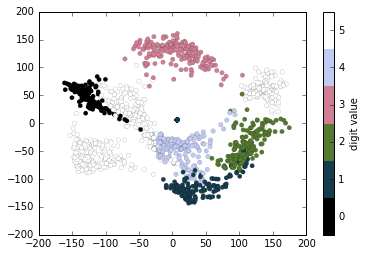

In [92]:
iso=Isomap(n_components=2)
projection = iso.fit_transform(digits.data)
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))   
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)


In [79]:
iso.fit_transform?

In [80]:
digits.data?

The projection also gives us some interesting insights on the relationships within the
dataset: for example, the ranges of 5 and 3 nearly overlap in this projection, indicating
that some handwritten fives and threes are difficult to distinguish, and therefore
more likely to be confused by an automated classification algorithm. Other values,
like 0 and 1, are more distantly separated, and therefore much less likely to be con‐
fused. This observation agrees with our intuition, because 5 and 3 look much more
similar than do 0 and 1.


## Multiple Subplots

Sometimes it is helpful to compare different views of data side by side. To this end,
Matplotlib has the concept of subplots: groups of smaller axes that can exist together
within a single figure. These subplots might be insets, grids of plots, or other more
complicated layouts.

In [7]:
%matplotlib inline
plt.style.use('seaborn-white')

### plt.axes: Subplots by Hand

The most basic method of creating an axes is to use the plt.axes function. As we’ve
seen previously, by default this creates a standard axes object that fills the entire 
figure. plt.axes also takes an optional argument that is a list of four numbers in the
figure coordinate system. These numbers represent [bottom, left, width,
height] in the figure coordinate system, which ranges from 0 at the bottom left of the
figure to 1 at the top right of the figure

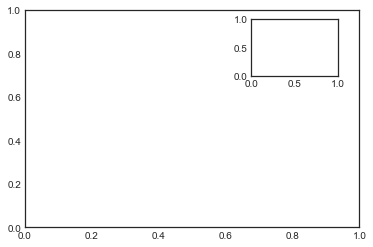

In [16]:
ax1=plt.axes()   
ax2=plt.axes([0.65,0.65,0.2,0.2])   # [bottom, left, width, height]

The equivalent of this command within the object-oriented interface is
fig.add_axes()

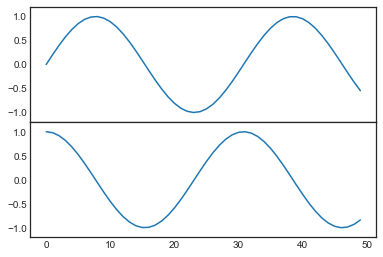

In [23]:
fig=plt.figure()
ax1=fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[],ylim=(-1.2,1.2))
ax2=fig.add_axes([0.1,0.1,0.8,0.4],ylim=(-1.2,1.2))

x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

In [21]:
fig.add_axes?

### plt.subplot: Simple Grids of Subplots

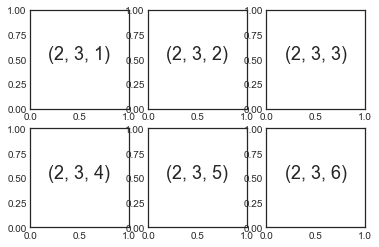

In [34]:
for i in range(1, 7):   # This plot can even be customised as follows
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

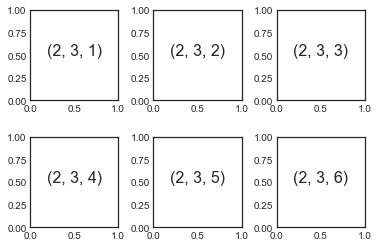

In [37]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str((2,3,i)),
            fontsize=16,ha='center')


In [25]:
plt.text?

The command plt.subplots_adjust can be used to adjust the spacing between
these plots. The following code uses the
equivalent object-oriented command

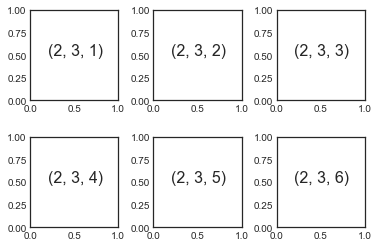

In [58]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(0.2,0.5,str((2,3,i)),   # This 0.2,0.5 represents the position from where to start printing text
            fontsize=16 )

In [38]:
fig.subplots_adjust?

### plt.subplots: The Whole Grid in One Go

The approach just described can become quite tedious when you’re creating a large
grid of subplots, especially if you’d like to hide the x- and y-axis labels on the inner
plots. For this purpose, plt.subplots() is the easier tool to use (note the s 'subplots')

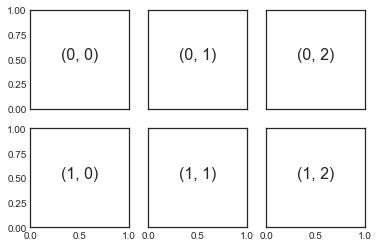

In [64]:
fig,ax=plt.subplots(2,3,sharex='col',sharey='row')
''' Rather than creating a single subplot, this function creates a full grid of
subplots in a single line, returning them in a NumPy array. '''
for i in range(2):
    for j in range (3):
        ax[i,j].text(0.5,0.5,str((i,j)),ha='center',fontsize=16)
    

### plt.GridSpec: More Complicated Arrangements


To go beyond a regular grid to subplots that span multiple rows and columns,
plt.GridSpec() is the best tool. The plt.GridSpec() object does not create a plot by
itself; it is simply a convenient interface that is recognized by the plt.subplot()
command.

In [66]:
grid=plt.GridSpec(2,3,wspace=0.4,hspace=0.3)


GridSpec(2, 3)

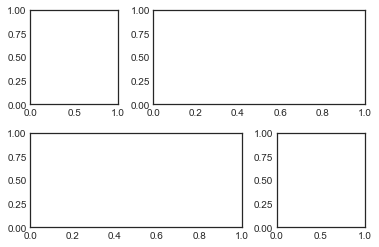

In [70]:
plt.subplot(grid[0,0])   
plt.subplot(grid[0,1:])    # grid[0,1:] commands to merge 1 and after columns in 0th row here
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

This type of  flexible grid alignment has a wide range of uses. 
I most often use it when creating multi-axes histogram plots

In [71]:
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,10000).T

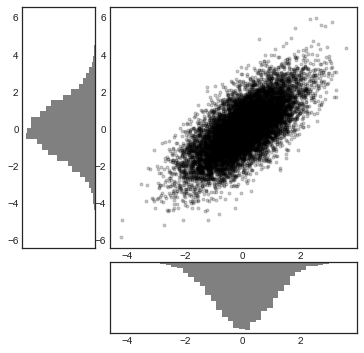

In [78]:
# Setting up the axis with GridSpec
fig=plt.figure(figsize=(6,6))
grid=plt.GridSpec(4,4,hspace=0.2,wspace=0.2)
main_axis=fig.add_subplot(grid[:-1,1:])
y_hist=fig.add_subplot(grid[:-1,:1],xticklabels=[],sharey=main_axis)
x_hist=fig.add_subplot(grid[-1,1:],yticklabels=[],sharex=main_axis)

#scatter points on the main axis
main_axis.plot(x,y,'ok',markersize=3,alpha=0.2)

# Histogram on the x axis
x_hist.hist(x, 40, histtype='stepfilled',
 orientation='vertical', color='gray')
x_hist.invert_yaxis()

# Histogram on the y axis
y_hist.hist(y, 40, histtype='stepfilled',
 orientation='horizontal', color='gray')
y_hist.invert_xaxis()


In [73]:
grid?

## Text and Annotation


In [84]:
births=pd.read_csv(r'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [87]:
quartiles = np.percentile(births['births'], [25, 50, 75])  # This means that out of the given 15546 days , 75% of times 
quartiles     # births per day is below 5289.5

array([4358. , 4814. , 5289.5])

C:\Users\gdg13\anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


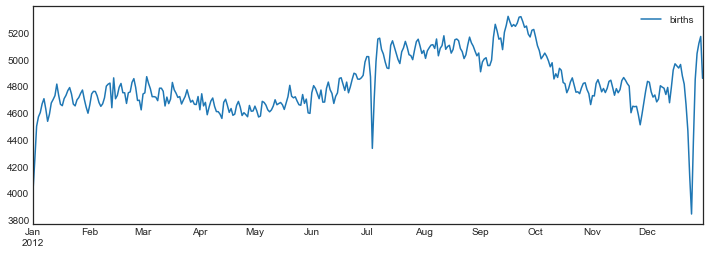

In [111]:
mu , sig = quartiles[1], 0.74*(quartiles[2]-quartiles[0]) # mu=quartiles[1]=4814, sig=(0.74*(quartiles[2]-quartiles[0]))
births=births.query('(births>@mu - 5*@sig)&(births< @mu + 5*@sig)')
births['day']=births['day'].astype(int)

births.index=pd.to_datetime(10000*births.year+100*births.month+births.day,format='%Y%m%d')
births_by_date=births.pivot_table('births',[births.index.month,births.index.day])

births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [ ]:
births.pivot_table?

When we’re communicating data like this, it is often useful to annotate certain fea‐
tures of the plot to draw the reader’s attention. This can be done manually with the
plt.text/ax.text command

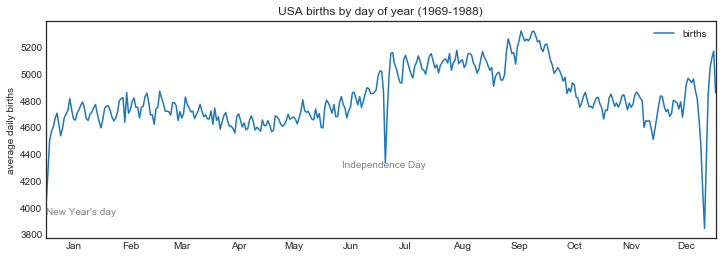

In [120]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Adding labels to the plot
style=dict(size=10,color='gray')

ax.text('2012-1-1',3950,"New Year's day",**style)
ax.text('2012-7-3',4300,"Independence Day",ha='center',**style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

"ax.xaxis.set_major_locator(mpl.dates.MonthLocator())\nax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))\nax.xaxis.set_major_formatter(plt.NullFormatter())\nax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));"

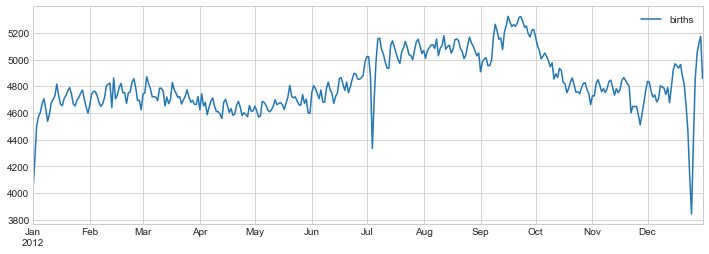

In [155]:
fig, ax = plt.subplots(figsize=(12, 4))   #even these 2 commands give maximum out of this
births_by_date.plot(ax=ax)
'''ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));'''

The ax.text method takes an x position, a y position, a string, and then optional key‐
words specifying the color, size, style, alignment, and other properties of the text.
Here we used ha='right' and ha='center', where ha is short for horizonal align‐
ment. See the docstring of plt.text() and of mpl.text.Text() for more information
on available options.

### Transforms and Text Position

In the previous example, we anchored our text annotations to data locations. Some‐
times it’s preferable to anchor the text to a position on the axes or figure, independent
of the data. In Matplotlib, we do this by modifying the transform

There are three predefined transforms that can be useful in this situation:

ax.transData- Transform associated with data coordinates

ax.transAxes- Transform associated with the axes (in units of axes dimensions)

fig.transFigure- Transform associated with the figure (in units of figure dimensions)

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

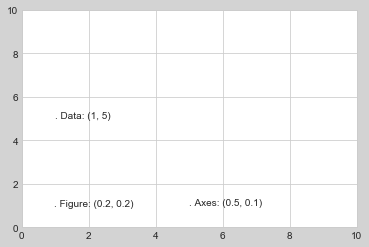

In [123]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

The transData coordinates give the usual data coordinates associated with the x- and
y-axis labels. The transAxes coordinates give the location from the bottom-left 
corner of the axes (here the white box) as a fraction of the axes size. The transFigure
coordinates are similar, but specify the position from the bottom left of the figure
(here the gray box) as a fraction of the figure size.

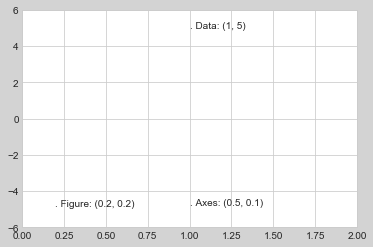

In [124]:
ax.set_xlim(0, 2)  # Now u can see the behaviour of the data clearly 
ax.set_ylim(-6, 6)
fig

### Arrows and Annotation

Drawing arrows in Matplotlib is often much harder than you might hope. While there 
is a plt.arrow() function available, I wouldn’t suggest using it; the arrows it creates 
are SVG objects that will be subject to the varying aspect ratio of your plots, and the 
result is rarely what the user intended. Instead, I’d suggest using the plt.annotate() function.
This function creates some text and an arrow, and the arrows can be very flexibly specified.


Text(5, -6, 'local minima')

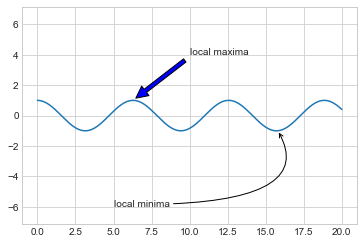

In [149]:
%matplotlib inline 
fig, ax=plt.subplots()

x=np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal')

ax.annotate('local maxima',xy=(6.28,1),xytext=(10,4),arrowprops=dict(facecolor='blue', shrink=0.05))
ax.annotate('local minima',xy=(15.8,-1),xytext=(5,-6),arrowprops=dict(arrowstyle='->',connectionstyle="angle3,angleA=0,angleB=120"))

The arrow style is controlled through the arrowprops dictionary, which has numerous 
options available. These options are fairly well documented in Matplotlib’s online
documentation, some of the examples are below

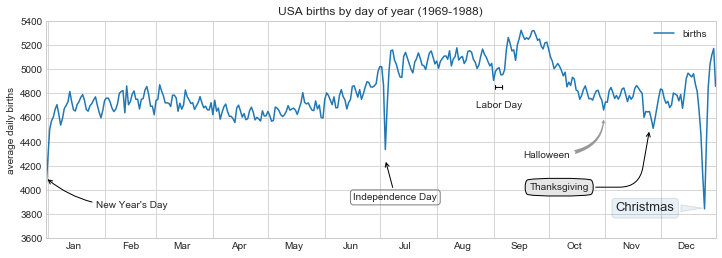

In [156]:
fig, ax = plt.subplots(figsize=(12, 4))   
births_by_date.plot(ax=ax)
# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
             bbox=dict(boxstyle="round", fc="none", ec="gray"),
             xytext=(10, -40), textcoords='offset points', ha='center',
             arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
             xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
            fc="0.6", ec="none",
            connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
             xytext=(-120, -60), textcoords='offset points',
             bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
             arrowprops=dict(arrowstyle="->",
             connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);

You’ll notice that the specifications of the arrows and text boxes are very detailed: this
gives you the power to create nearly any arrow style you wish. Unfortunately, it also
means that these sorts of features often must be manually tweaked, a process that can
be very time-consuming when one is producing publication-quality graphics! Finally,
I’ll note that the preceding mix of styles is by no means best practice for presenting
data, but rather included as a demonstration of some of the available options.

## Customizing Ticks
